In [2]:
import math
from typing import Callable
import numpy as np

import matplotlib.pyplot as plt

## Voorbeeld: Knikkers trekken
Je hebt een pot met 10 knikkers. Je hebt 1 groene, 2 blauwe, 3 gele en 4 rode knikkers. Je trekt er 1. Wat is de kans dat die knikker blauw of groen is?

Simuleer:

We kiezen een random getal in het interval [1,10]. Een 1 komt overeen met groen, 2 of 3 met blauw, 4 t/m 6 met geel en 7 t/m 10 met rood. Maak hierbij gebruik van np.random.randint. 
Voer de simulatie 100 keer uit en bepaal daarmee de bijbehorende kans.

In [14]:
np.random.randint(1,11)

2

In [17]:
def random_ball(random_number):
    if random_number==1:
        return 'green'
    elif random_number<4:
        return 'blue'
    elif random_number<7:
        return 'yellow'
    else:
        return 'red'
        

In [33]:
number_of_experiments = 100
sum([(random_ball(random_number)=='green' or random_ball(random_number)=='blue') for random_number in np.random.randint(1,11,number_of_experiments)])

28

In [19]:
np.random.randint(1,11,number_of_experiments)

array([ 3,  1,  2,  4,  9,  2,  4,  7,  5, 10,  3,  7,  4,  3,  3,  5,  3,
        3,  8,  7,  1,  8,  2,  1,  9,  5,  9,  9,  9, 10,  1,  9,  4,  2,
        7,  7,  3,  4,  4,  1,  1,  6,  7,  4, 10,  7,  4,  9,  4, 10, 10,
        1,  7,  8,  6,  2,  6, 10,  2,  5, 10,  8,  9, 10,  3,  4, 10, 10,
        4,  2,  8,  8,  1,  4,  4,  3, 10,  1,  4, 10,  2,  2,  2, 10,  4,
        6,  2,  3,  5,  1, 10,  3,  6,  7,  1, 10,  8,  8,  9,  2])

Stel je pakt 100 keer een bal, hoe vaak zal die rood zijn? (Voorbeeld met np.random.choice)

In [63]:
sum(np.random.choice(['blue','green','red','yellow'], p = [2/10, 1/10, 4/10, 3/10], size = 100)=='red')

48

Nu trekken we 2 knikkers, wat is de kans op een gele en een rode? Simuleer hiervoor 1000 trekkingen.

In [84]:
pot = ['blue'] +['green']*2 + ['yellow']*3 + ['red']*4

In [91]:
sample = np.zeros(1000)

for i in range(1000):
    ballen = np.random.choice(pot,  size = 2, replace = False)
    if ('yellow' in ballen and 'red' in ballen):
        sample[i] = 1
sum(sample)

249.0

## Oefenopdracht normale verdeling

In [92]:
def norm_pdf(x: float) -> float:
    return 1/math.sqrt(2 * math.pi) * math.exp(-x**2 / 2)

def get_integral_between(func: Callable[[float], float], x1: float, x2: float, delta: float = 0.00001) -> float:
    x = x1
    integral = 0
    while x < x2:
        integral += (func(x) + func(x + delta)) / 2 * delta
        x += delta
    return integral
    
get_integral_between(norm_pdf, 0, 1)

0.3413471657617572

In [93]:
def length(x):
    return 1/(25 * math.sqrt(2 * math.pi)) * math.exp(-1/2 * ((x-175)/25)**2 )

In [94]:
get_integral_between(length, 170, 190)

0.3050065916768211

## Machine onderhoud

In [107]:
days = 1000
prob_dict = {'motor':0.02, 'lopende band':0.05, 'pers' : 0.01, 'lader' : 0.03, 'compressor':0.06}

broken_days_counter = 0

for day in range(days):
    broken = False
    for key in prob_dict:
        broken = np.random.choice([True, False], p = [prob_dict[key], 1 - prob_dict[key]])
        if broken:
            broken_days_counter +=1
            break
        
broken_days_counter

176

In [115]:
days = 1000000
probs = [0.02, 0.05, 0.01, 0.03, 0.06]

broken_days_counter = 0
broken_part = []

for _ in range(days):
    broken = False
    for item in probs:
        broken = np.random.choice([True, False], p = [item, 1 - item])
        if broken:
            broken_days_counter +=1
            break
        
1- broken_days_counter/1000

-158.423

In [106]:
kans_niet_kapot = 1
for value in probs:
    kans_niet_kapot *= (1-value)

kans_niet_kapot
    

0.8403969419999998

## Oefenopdracht verwachtingswaarde continue stochast

In [117]:
def prob_func(x: float)->float:
    return 1/44.267*math.exp(-((x-175)/25)**2)

#get_integral_between(prob_func, 140, 200)

In [119]:
def integrand(x):
    return x*prob_func(x)

In [122]:
vw = get_integral_between(integrand, 100, 250)

In [121]:
vw

175.17144362190993

opdracht b

In [33]:
def p(x):
    return 2.1754*3**(-2*x)

In [34]:
x = np.linspace(0,10, 1000)

In [35]:
y = p(x)

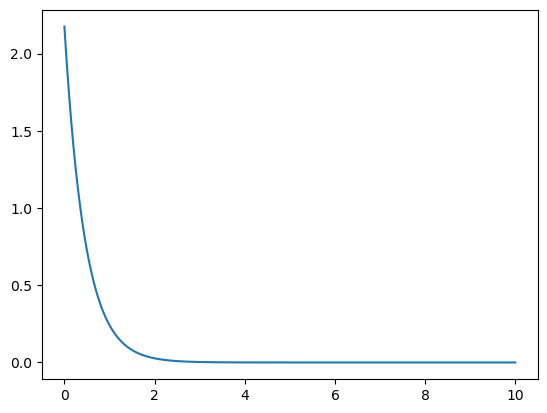

In [38]:
plt.plot(x,y)

In [39]:
def integrand(x):
    return x * p(x)

In [40]:
get_integral_between(integrand, 0,6)

0.4505869787428179